## Case Study Competition

## 1. Importing the Required Libraries

In [163]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv("D:/DECODER/projects file/student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Here the target variable is G3 and if I am not wrong this may be the final grade. Rest are features.

**2.1 Check the Size of the df**

In [165]:
df.shape

(395, 33)

**2.2 Check the Column wise Infomation**

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**2.3 Check the Summary of the df**

In [167]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**2.4 Check for the Null Values**

In [168]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 3. EDA

### 3.1 For 'School'

In [169]:
## Unique Value Check

In [170]:
df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [171]:
## Value Counts

In [172]:
df['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [173]:
## Checking for Mean and Std

In [174]:
df[['school','G3']].groupby(df['school'],as_index=True).mean()

,G3
school,
GP,10.489971
MS,9.847826


In [175]:
df[['school','G3']].groupby(df['school'],as_index=True).std()

,G3
school,
GP,4.625397
MS,4.237229


Both schools have a close mean and std is also quite similar but GP school has higher mean and std.
And one more thing is that high std is not good for the model. So we have to drop this feature.

But we can check visually. So let's do it.

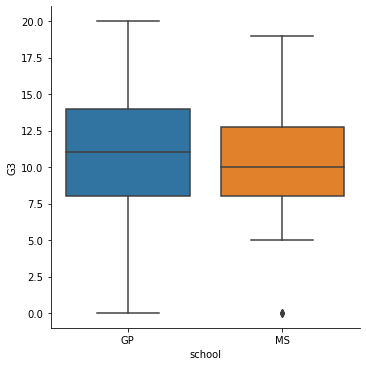

In [176]:
sns.catplot(x="school",y="G3", kind="box",data=df)

In [177]:
### We can drop the 'school' feature.

df.drop('school', axis='columns', inplace=True)

In [178]:
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10


### 3.2 For 'sex'

In [179]:
## categorical plot of sex wrt G3

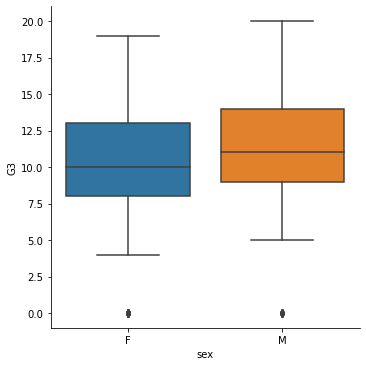

In [180]:
sns.catplot(x="sex",y="G3",kind="box",data=df)

Males are performing better. So it can be an important feature and we should keep it.

### 3.3 For 'age'

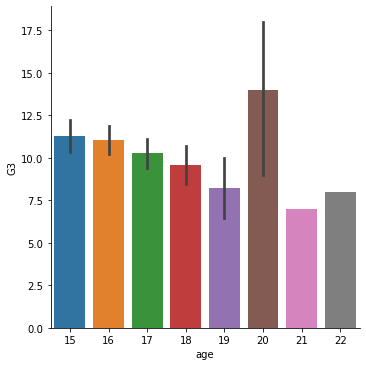

In [181]:
sns.catplot(x="age",y="G3",kind="bar",data=df)

Average mean look like different for different age group. We can keep this feature

### 3.4 For 'address'

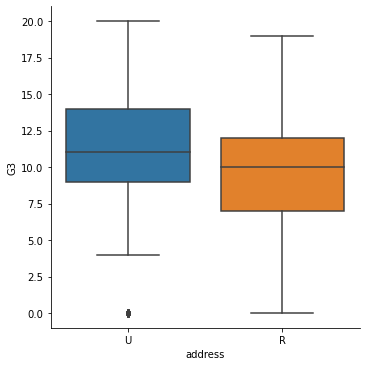

In [182]:
sns.catplot(x="address",y="G3", kind="box",data=df)

It looks like 'R' group students are not performing so well.

### 3.5 For 'family_size'

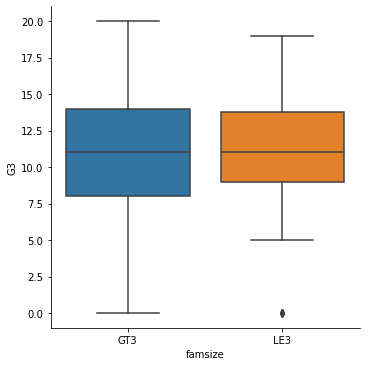

In [183]:
sns.catplot(x="famsize",y="G3", kind="box",data=df)

It looks like the variance is high so we have to drop this feature as it is not so important for us. 

In [184]:
df.drop('famsize', axis='columns', inplace=True)

In [185]:
df.head()

,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,A,4,4,at_home,teacher,course,mother,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,T,1,1,at_home,other,course,father,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,T,1,1,at_home,other,other,mother,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,T,4,2,health,services,home,mother,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,T,3,3,other,other,home,father,...,4,3,2,1,2,5,4,6,10,10


### 3.6 For 'Parent status'

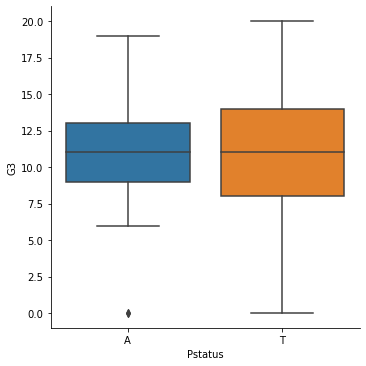

In [186]:
sns.catplot(x="Pstatus",y="G3", kind="box",data=df)

It also looks like the variance is high so we have to drop this feature.

In [187]:
df.drop('Pstatus', axis='columns', inplace=True)

In [188]:
df.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,4,4,at_home,teacher,course,mother,2,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,1,1,at_home,other,course,father,1,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,1,1,at_home,other,other,mother,1,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,4,2,health,services,home,mother,1,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,3,3,other,other,home,father,1,...,4,3,2,1,2,5,4,6,10,10


### 3.7 For 'Mother Education'

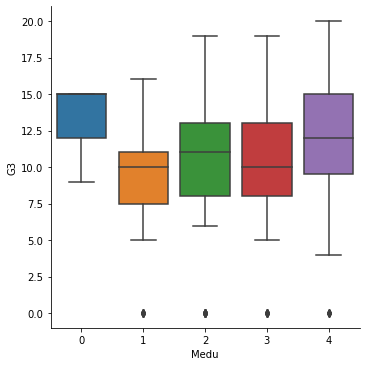

In [189]:
sns.catplot(x="Medu",y="G3", kind="box",data=df)

It looks like higher educated mothers have higher grade sons (students). So we can consider this feature.

### 3.8 For 'Father Education'

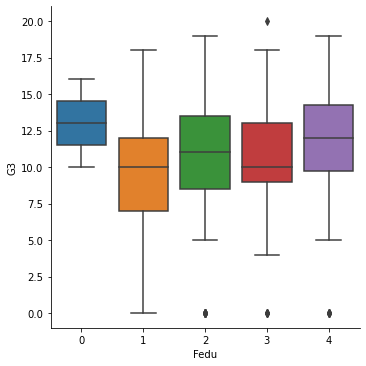

In [190]:
sns.catplot(x="Fedu",y="G3", kind="box",data=df)

It also looks like the previous one i.e Mother Education. So we can also keep this.

### 3.9 For 'Mother Job'

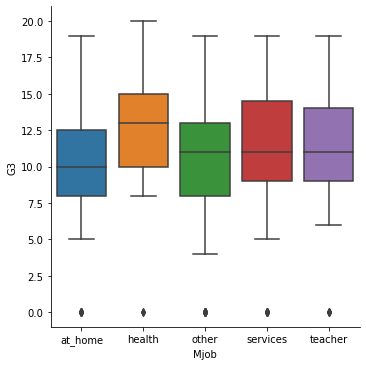

In [191]:
sns.catplot(x="Mjob",y="G3", kind="box",data=df)

It is confirmed that behind the grade of a student, there is mother's hand.

### 3.10 For 'Father Job'

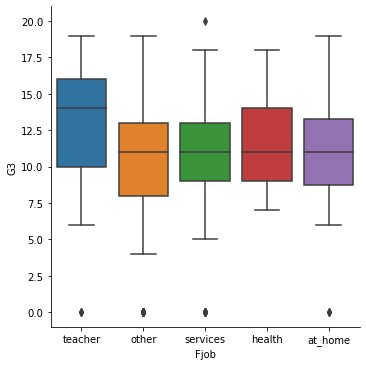

In [192]:
sns.catplot(x="Fjob",y="G3", kind="box",data=df)

We can keep it by considering two groups. One is Teacher and rest are the other group.

### 3.11 For 'Reason'

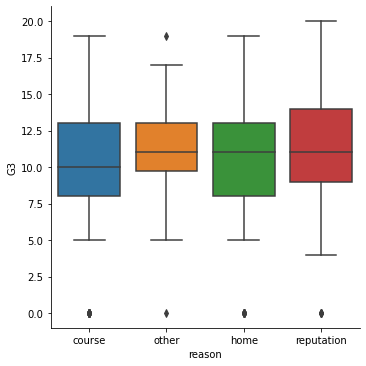

In [193]:
sns.catplot(x="reason",y="G3", kind="box",data=df)

This looks like confusing so for now we keep this.

### 3.12 For 'guardian'

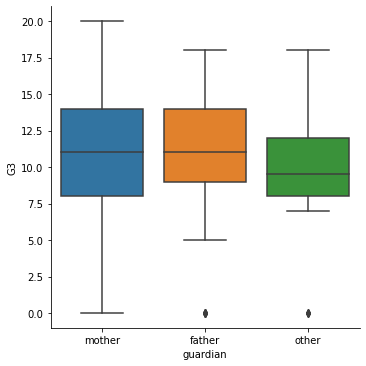

In [194]:
sns.catplot(x="guardian",y="G3", kind="box",data=df)

When mother and father are the guardians, mean is quite similar as compared to other. So we can keep this feature. And also we can group them mother and father separately.

### 3.13 For 'traveltime'

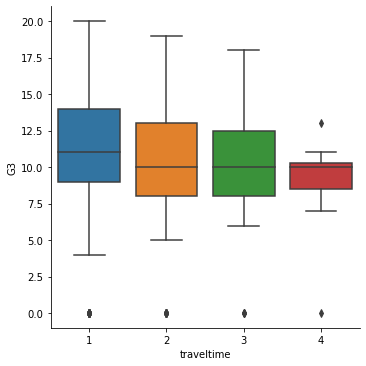

In [195]:
sns.catplot(x="traveltime",y="G3", kind="box",data=df)

Looks like no difference in travel time but in case of 2, 3 and 4 the mean is quite similar. What we can do is just merge them into one group.

### 3.14 For 'studytime'

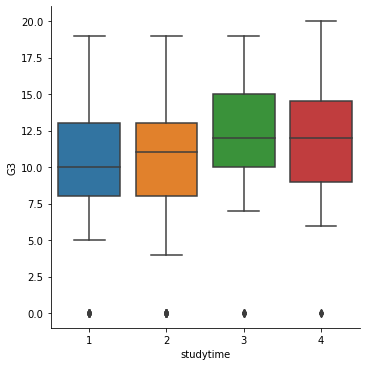

In [196]:
sns.catplot(x="studytime",y="G3", kind="box",data=df)

We can say that more study higher grade. But in case of 5-10 hours of study it looks like there is no impact on the grade. So we can keep this feature by grouping 3,4 as 3 because their mean is quite similar.

### 3.15 For 'failures'

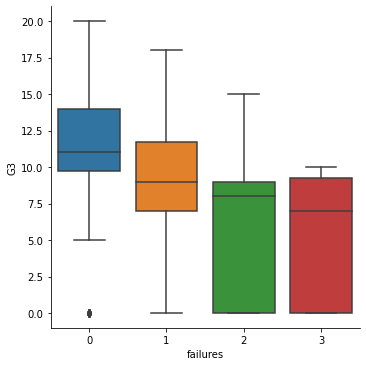

In [197]:
sns.catplot(x="failures",y="G3", kind="box",data=df)

Variance is so large. We may confuse i.e we may keep or may not. For now keep this feature.

In [198]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 3.16 for 'schoolsupport'

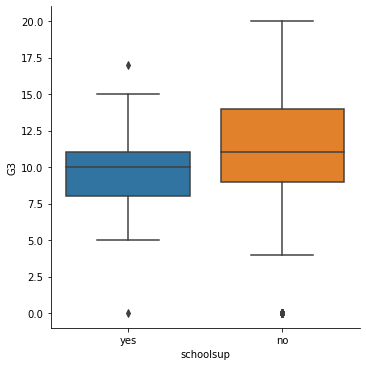

In [199]:
sns.catplot(x="schoolsup",y="G3", kind="box",data=df)

Students with lower grade may need the school support.

### 3.17 For 'familysupport'

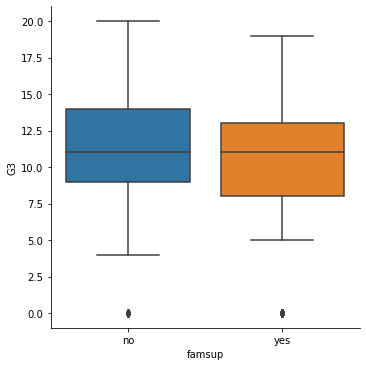

In [200]:
sns.catplot(x="famsup",y="G3", kind="box",data=df)

We can remove this feature as it looks like there is no difference in family support yes and no.

In [201]:
df.drop('famsup', axis='columns', inplace=True)

In [202]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

### 3.18 For 'paid'

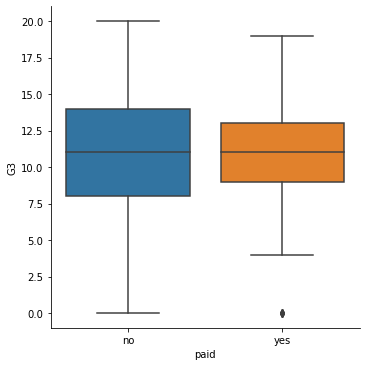

In [203]:
sns.catplot(x="paid",y="G3", kind="box",data=df)

As mean is same and paid ones have very small variance, we can remove this feature.

In [204]:
df.drop('paid', axis='columns', inplace=True)

In [205]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

### 3.19 For 'activities'

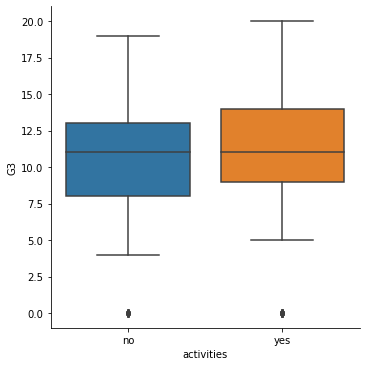

In [206]:
sns.catplot(x="activities",y="G3", kind="box",data=df)

It looks like other activities have not any effect on grade. So we can remove it.

In [207]:
df.drop('activities', axis='columns', inplace=True)

In [208]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 3.20 For 'nursery'

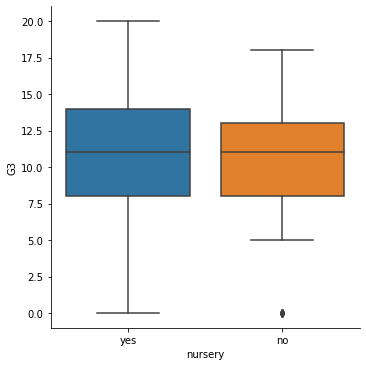

In [209]:
sns.catplot(x="nursery",y="G3", kind="box",data=df)

It looks like irrelevant so we can drop it out.

In [210]:
df.drop('nursery', axis='columns', inplace=True)

In [211]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 3.21 For 'higher'

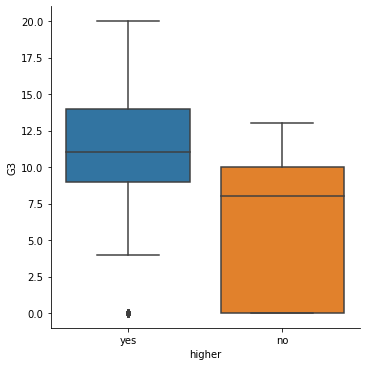

In [212]:
sns.catplot(x="higher",y="G3", kind="box",data=df)

Higher education aiming people are doing better.

### 3.22 For 'internet'

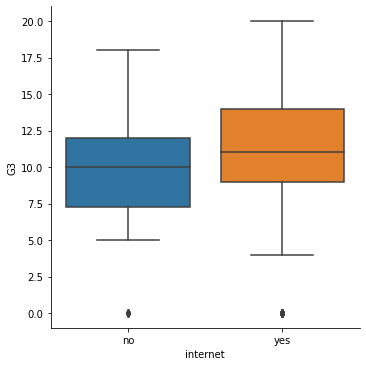

In [213]:
sns.catplot(x="internet",y="G3", kind="box",data=df)

We can keep this feature as it has a positive effect on grade.

### 3.23 For 'romantic'

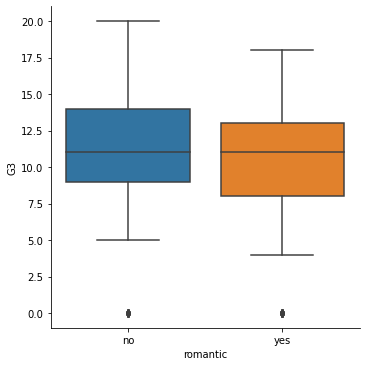

In [214]:
sns.catplot(x="romantic",y="G3", kind="box",data=df)

Here relationship does not matter so we can remove this feature.

In [215]:
df.drop('romantic', axis='columns', inplace=True)

In [216]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 3.24 For 'famrel'

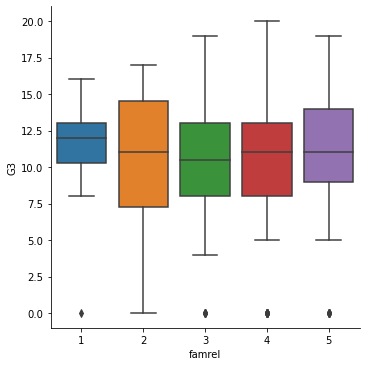

In [217]:
sns.catplot(x="famrel",y="G3", kind="box",data=df)

Looks like no difference in family relationship, so we can remove this out.

In [218]:
df.drop('famrel', axis='columns', inplace=True)

In [219]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 3.25 For 'freetime'

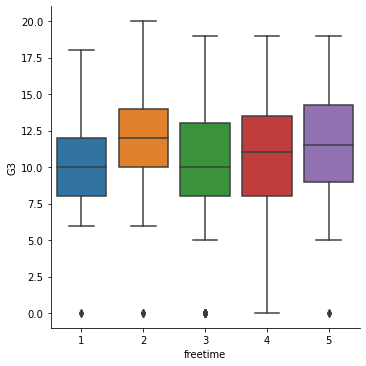

In [220]:
sns.catplot(x="freetime",y="G3", kind="box",data=df)

This feature may make us confused as it looks like more divergent df wrt time. So for now we can keep this feature.

### 3.26 For 'goout'

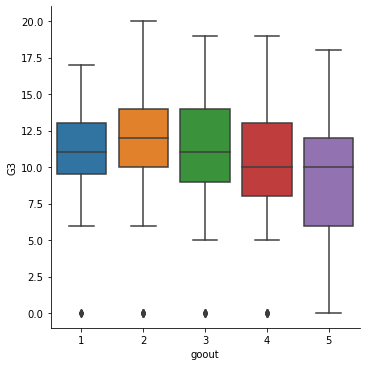

In [221]:
sns.catplot(x="goout",y="G3", kind="box",data=df)

It also looks like confused as higher goout time results bad grade and also lower goout time does the same. In case of average time goout is good grade that may be wondering for mindfresh. For now we can keep this feature.

### 3.27 For 'Dalc'

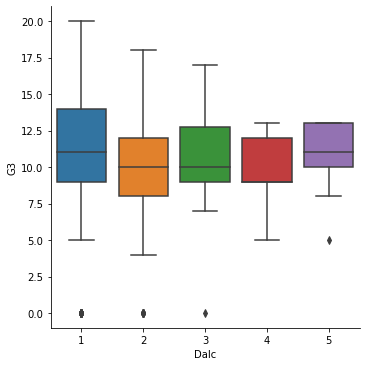

In [222]:
sns.catplot(x="Dalc",y="G3", kind="box",data=df)

It looks like confusion so for now we can keep this feature.

### 3.28 For 'Walc'

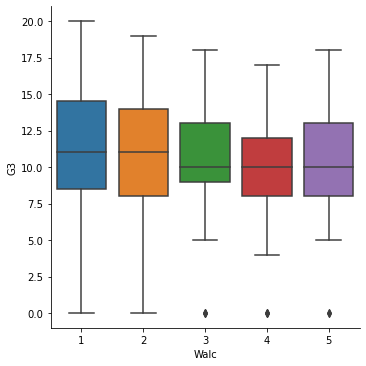

In [223]:
sns.catplot(x="Walc",y="G3", kind="box",data=df)

 Looks like the mean grade decreases after a fixed amount of alcohol consumption during the weekend. We can keep this feature.

### 3.29 For 'health'

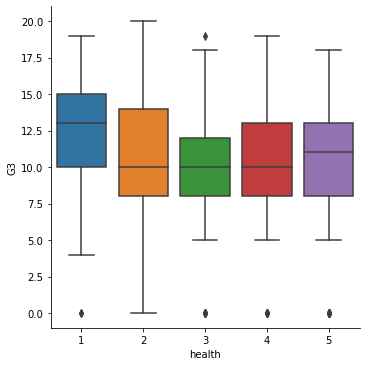

In [224]:
sns.catplot(x="health",y="G3", kind="box",data=df)

It is surprised that having bad health has higher grade. We can keep this feature as we can group as 2-4(means are similar)

### 3.30 For 'absences'

As it has the more influence in students final grade, we can group it into few subgroups.

In [225]:
df.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,4,4,at_home,teacher,course,mother,2,...,no,3,4,1,1,3,6,5,6,6
1,F,17,U,1,1,at_home,other,course,father,1,...,yes,3,3,1,1,3,4,5,5,6
2,F,15,U,1,1,at_home,other,other,mother,1,...,yes,3,2,2,3,3,10,7,8,10
3,F,15,U,4,2,health,services,home,mother,1,...,yes,2,2,1,1,5,2,15,14,15
4,F,16,U,3,3,other,other,home,father,1,...,no,3,2,1,2,5,4,6,10,10


In [226]:
df['abs'] = pd.cut(df['absences'],10, duplicates='drop')

In [227]:
df['abs'].unique()

[(-0.075, 7.5], (7.5, 15.0], (15.0, 22.5], (22.5, 30.0], (52.5, 60.0], (67.5, 75.0], (37.5, 45.0]]
Categories (7, interval[float64]): [(-0.075, 7.5] < (7.5, 15.0] < (15.0, 22.5] < (22.5, 30.0] < (37.5, 45.0] < (52.5, 60.0] < (67.5, 75.0]]

In [228]:
df[['abs','G3']].groupby(df['abs'],as_index=False).count()

,abs,G3
0,287,287
1,75,75
2,22,22
3,6,6
4,0,0
5,2,2
6,0,0
7,2,2
8,0,0
9,1,1


In [229]:
df.loc[df['absences'] <= 15, 'absences' ] = 0
df.loc[(df['absences'] > 15) & (df['absences'] <= 23), 'absences'] = 1
df.loc[df['absences'] > 23, 'absences' ] = 2

0 --- < 15 absences
<br>1 --- < 23 and > 15 absences
<br>2 --- > 23 absences

In [230]:
df.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,abs
0,F,18,U,4,4,at_home,teacher,course,mother,2,...,3,4,1,1,3,0,5,6,6,"(-0.075, 7.5]"
1,F,17,U,1,1,at_home,other,course,father,1,...,3,3,1,1,3,0,5,5,6,"(-0.075, 7.5]"
2,F,15,U,1,1,at_home,other,other,mother,1,...,3,2,2,3,3,0,7,8,10,"(7.5, 15.0]"
3,F,15,U,4,2,health,services,home,mother,1,...,2,2,1,1,5,0,15,14,15,"(-0.075, 7.5]"
4,F,16,U,3,3,other,other,home,father,1,...,3,2,1,2,5,0,6,10,10,"(-0.075, 7.5]"


In [231]:
df[['absences','G3']].groupby(df['absences'], as_index=False).count()

,absences,G3
0,362,362
1,23,23
2,10,10


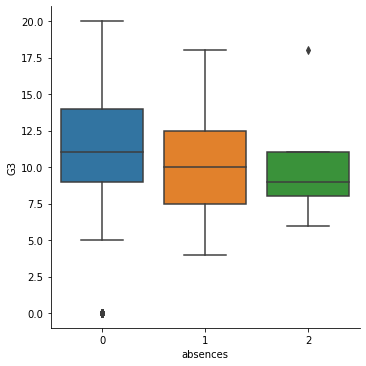

In [232]:
sns.catplot(x="absences",y="G3", kind="box",data=df)

Now we can see decreasing the grade wrt absences.

In [233]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'abs'],
      dtype='object')

Now we can remove the column 'abs'

In [234]:
df.drop('abs', axis='columns', inplace=True)

In [235]:
df.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,4,4,at_home,teacher,course,mother,2,...,no,3,4,1,1,3,0,5,6,6
1,F,17,U,1,1,at_home,other,course,father,1,...,yes,3,3,1,1,3,0,5,5,6
2,F,15,U,1,1,at_home,other,other,mother,1,...,yes,3,2,2,3,3,0,7,8,10
3,F,15,U,4,2,health,services,home,mother,1,...,yes,2,2,1,1,5,0,15,14,15
4,F,16,U,3,3,other,other,home,father,1,...,no,3,2,1,2,5,0,6,10,10


Now we can convert the categorical features into numerical features and also group some numerical features. Because different numerical features are not affecting the grade.

In [236]:
df['sex'] = df['sex'].map({'M':0,'F':1})

In [237]:
df['address'] = df['address'].map({'U':1,'R':0})

In [238]:
df['age'] = df['age'].map({15:4, 16:4, 17:3, 18:2, 19:1, 20:5, 21:0, 22:1})

In [239]:
df['Medu'] = df['Medu'].map({0:3, 1:0, 2:1, 3:0, 4:1})

In [240]:
df['Fedu'] = df['Fedu'].map({0:2, 1:0, 2:1, 3:0, 4:1})

In [241]:
df['Mjob'] = df['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':1})

In [242]:
df['Fjob'] = df['Fjob'].map({'at_home':0, 'health':0, 'other':0, 'services':0, 'teacher':1})

In [243]:
df['reason'] = df['reason'].map({'course':0, 'home':1, 'other':1, 'reputation':1})

In [244]:
df['guardian'] = df['guardian'].map({'mother':1, 'father':1, 'other':0})

In [245]:
df['traveltime'] = df['traveltime'].map({1:0, 2:1, 3:1, 4:1})

In [246]:
df['studytime'] = df['studytime'].map({1:0, 2:1, 3:2, 4:2})

In [247]:
df['failures'] = df['failures'].map({0:0, 1:1, 2:2, 3:2})

In [248]:
df['schoolsup'] = df['schoolsup'].map({'no':1, 'yes':0})

In [249]:
df['higher'] = df['higher'].map({'no':0, 'yes':1})

In [250]:
df['internet'] = df['internet'].map({'no':0, 'yes':1})

In [251]:
df['freetime'] = df['freetime'].map({1:0, 2:2, 3:0, 4:1, 5:1})

In [252]:
df['goout'] = df['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})

In [253]:
df['Dalc'] = df['Dalc'].map({1:1, 2:0, 3:0, 4:1, 5:1})

In [254]:
df['Walc'] = df['Walc'].map({1:1, 2:1, 3:0, 4:0, 5:0})

In [255]:
df['health'] = df['health'].map({1:2, 2:0, 3:0, 4:0, 5:1})

In [256]:
df['G3'] = df['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:1, 11:1, 12:1, 13:1, 14:1, 
                             15:1, 16:1, 17:1, 18:1, 19:1, 20:1})

## 4. Extracting the Features and the Target Variables

In [257]:
df.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [258]:
feature_columns = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2']

In [259]:
X = df[feature_columns]
y = df.G3

In [260]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   address     395 non-null    int64
 3   Medu        395 non-null    int64
 4   Fedu        395 non-null    int64
 5   Mjob        395 non-null    int64
 6   Fjob        395 non-null    int64
 7   reason      395 non-null    int64
 8   guardian    395 non-null    int64
 9   traveltime  395 non-null    int64
 10  studytime   395 non-null    int64
 11  failures    395 non-null    int64
 12  schoolsup   395 non-null    int64
 13  higher      395 non-null    int64
 14  internet    395 non-null    int64
 15  freetime    395 non-null    int64
 16  goout       395 non-null    int64
 17  Dalc        395 non-null    int64
 18  Walc        395 non-null    int64
 19  health      395 non-null    int64
 20  absences    395 non-null    int6

## 5. Model

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [263]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 23), (119, 23), (276,), (119,))

### Train a Logistic Model

In [264]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

### Predict the Model

In [265]:
y_pred_class = model.predict(X_test)
y_pred_class

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

## 6. Evaluate the Model

### Classification Report

In [266]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred_class))
print(accuracy_score(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.90      0.96      0.93        73

    accuracy                           0.91       119
   macro avg       0.91      0.89      0.90       119
weighted avg       0.91      0.91      0.91       119

0.907563025210084


### Confusion Matrix

In [267]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[38  8]
 [ 3 70]]
